In [1]:
import random
import numpy as np
from scipy.stats import norm 
import matplotlib.pyplot as plt

In [2]:
sigma_u = 1
vp_1 = 2
vp_2 = 8
sigma_p_1 = 2
sigma_p_2 = 2
dt = 0.005

In [3]:
infer_epoch = 800
sample_number = 20000

v_1 = np.random.normal(vp_1, np.sqrt(sigma_p_1), sample_number).tolist()
v_2 = np.random.normal(vp_2, np.sqrt(sigma_p_2), sample_number).tolist()

In [4]:
np.random.seed(0)
v_1_real = np.random.normal(4, np.sqrt(4), sample_number).tolist()
v_2_real = np.random.normal(10, np.sqrt(8), sample_number).tolist()

In [5]:
error_u = []
error_v = []
sigma_p_1_his = []
sigma_p_2_his = []

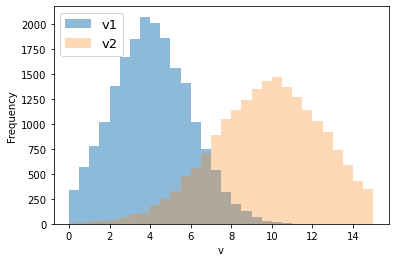

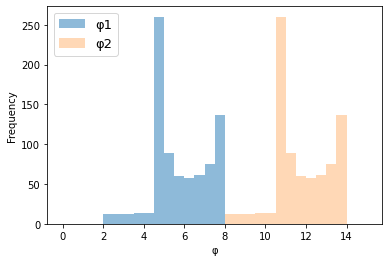

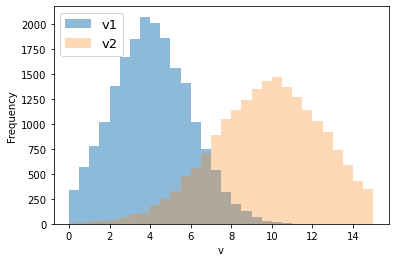

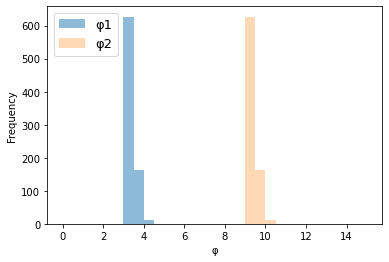

In [6]:
for i in range(sample_number):
    u = v_1_real[i] + v_2_real[i]
#     u = v_1[i] + v_2[i]
    phi_1 = list(range(infer_epoch))
    phi_1[0] = vp_1
#     phi_1[0] = random.randint(1, 6)
    phi_2 = list(range(infer_epoch))
    phi_2[0] = vp_2
#     phi_2[0] = random.randint(1, 6)
    ep_1 = list(range(infer_epoch))
#     ep_1[0] = 0
    ep_1[0] = (phi_1[0] - vp_1) / sigma_p_1
    ep_2 = list(range(infer_epoch))
#     ep_2[0] = 0
    ep_2[0] = (phi_2[0] - vp_2) / sigma_p_2
    eu = list(range(infer_epoch))
    eu[0] = (u - (phi_1[0] + phi_2[0])) / sigma_u
    
    # 推測
    for j in range(1, infer_epoch):
        phi_1[j] = phi_1[j-1] + dt * (-ep_1[j-1] + eu[j-1])
        phi_2[j] = phi_2[j-1] + dt * (-ep_2[j-1] + eu[j-1])
        ep_1[j] = ep_1[j-1] + dt * (phi_1[j-1] - vp_1 - sigma_p_1 * ep_1[j-1])
        ep_2[j] = ep_2[j-1] + dt * (phi_2[j-1] - vp_2 - sigma_p_2 * ep_2[j-1])
        eu[j] = eu[j-1] + dt * (u - (phi_1[j-1] + phi_2[j-1]) - sigma_u * eu[j-1])
        
        
        # fig2.savefig("φ_distribution2.png")
        
#     if i==0:
#         print("u:", u)
#         print("v_1_real:", v_1_real[i])
#         print("v_2_real:", v_2_real[i])
# #         print("v_1:", v_1[i])
# #         print("v_2:", v_2[i])
#         print("g(φ1,φ2):", phi_1[-1]+phi_2[-1])
#         print("phi_1:", phi_1[-1])
#         print("phi_2:", phi_2[-1])
#         print("vp_1:", vp_1)
#         print("vp_2", vp_2)
#         print("sigma_p_1:", sigma_p_1)
#         print("sigma_p_2:", sigma_p_2)
#         print("sigma_u:" , sigma_u)
        
    error_u.append(u - (phi_1[-1] + phi_2[-1]))
    error_v.append(1/2 * ((v_1_real[i] - phi_1[-1]) ** 2 + (v_2_real[i] - phi_2[-1]) ** 2))        

    # 注意
    vp_1 = vp_1 + ep_1[-1] * dt
    vp_2 = vp_2 + ep_2[-1] * dt
    sigma_p_1 = max(sigma_p_1 + 1/2 * (ep_1[-1]**2 - 1/sigma_p_1) * dt, 1)
    sigma_p_2 = max(sigma_p_2 + 1/2 * (ep_2[-1]**2 - 1/sigma_p_2) * dt, 1)
    sigma_u = max(sigma_u + 1/2 * (eu[-1]**2 - 1/sigma_u) * dt , 1) 

    sigma_p_1_his.append(sigma_p_1)
    sigma_p_2_his.append(sigma_p_2)
    
    if i==0:
        fig0_1 = plt.figure()    
        plt.hist(v_1_real, alpha=0.5, bins=30, range=(0, 15), rwidth=1.0, label="v1")
        plt.hist(v_2_real, alpha=0.3, bins=30, range=(0, 15), rwidth=1.0, label="v2")
        plt.xlabel("v")
        plt.ylabel("Frequency")
        plt.legend(loc="upper left", fontsize=13)
        plt.show()
        # fig1.savefig("v_distribution2.png")

        fig0_2 = plt.figure() 
        plt.hist(phi_1, alpha=0.5, bins=30, range=(0, 15), rwidth=1.0, label="φ1")
        plt.hist(phi_2, alpha=0.3, bins=30, range=(0, 15), rwidth=1.0, label="φ2")
        plt.xlabel("φ")
        plt.ylabel("Frequency")
        plt.legend(loc="upper left", fontsize=13)
        plt.show()
    
fig1 = plt.figure()    
plt.hist(v_1_real, alpha=0.5, bins=30, range=(0, 15), rwidth=1.0, label="v1")
plt.hist(v_2_real, alpha=0.3, bins=30, range=(0, 15), rwidth=1.0, label="v2")
plt.xlabel("v")
plt.ylabel("Frequency")
plt.legend(loc="upper left", fontsize=13)
plt.show()
# fig1.savefig("v_distribution2.png")

fig2 = plt.figure() 
plt.hist(phi_1, alpha=0.5, bins=30, range=(0, 15), rwidth=1.0, label="φ1")
plt.hist(phi_2, alpha=0.3, bins=30, range=(0, 15), rwidth=1.0, label="φ2")
plt.xlabel("φ")
plt.ylabel("Frequency")
plt.legend(loc="upper left", fontsize=13)
plt.show()
# fig2.savefig("φ_distribution2.png")

In [7]:
# fig1 = plt.figure()
# plt.scatter(range(infer_epoch), phi_1)
# plt.xlabel("epoch")
# plt.ylabel("φ_1")
# plt.plot()
# plt.grid()
# plt.show()
# # fig1.savefig("fig1.jpg")

# fig2 = plt.figure()
# plt.scatter(range(infer_epoch), phi_2)
# plt.xlabel("epoch")
# plt.ylabel("φ_2")
# plt.plot()
# plt.grid()
# plt.show()
# # fig2.savefig("fig2.jpg")

# fig3 = plt.figure()
# plt.scatter(range(infer_epoch), ep_1, color="r")
# plt.xlabel("epoch")
# plt.ylabel("prediction error of φ_1")
# plt.plot()
# plt.grid()
# plt.show()
# # fig3.savefig("fig3.jpg")

# fig4 = plt.figure()
# plt.scatter(range(infer_epoch), ep_2, color="r")
# plt.xlabel("epoch")
# plt.ylabel("prediction error of φ_2")
# plt.plot()
# plt.grid()
# plt.show()
# # fig4.savefig("fig4.jpg")

# fig5 = plt.figure()
# plt.scatter(range(infer_epoch), eu, color="g")
# plt.xlabel("epoch")
# plt.ylabel("prediction error of u")
# plt.plot()
# plt.grid()
# plt.show()
# # fig5.savefig("fig5.jpg")

# fig6 = plt.figure()
# plt.scatter(range(sample_number), sigma_p_1_his, color="k")
# plt.xlabel("epoch")
# plt.ylabel("variance of v_1")
# plt.plot()
# plt.grid()
# plt.show()
# # fig6.savefig("fig6.jpg")

# fig7 = plt.figure()
# plt.scatter(range(sample_number), sigma_p_2_his, color="k")
# plt.xlabel("epoch")
# plt.ylabel("variance of v_2")
# plt.plot()
# plt.grid()
# plt.show()
# # fig7.savefig("fig7.jpg")
    
# print("u:", u)
# print("v_1:", v_1[-1])
# print("v_2:", v_2[-1])
# print("g(φ1,φ2):", phi_1[-1]+phi_2[-1])
# print("phi_1:", phi_1[-1])
# print("phi_2:", phi_2[-1])
# print("sigma_p_1:", sigma_p_1)
# print("sigma_p_2:", sigma_p_2)
# print("sigma_u:" , sigma_u)

# print("u:", u)
# print("v_1:", v_1[-1])
# print("v_2:", v_2[-1])
# print("g(φ1,φ2):", phi_1[-1]+phi_2[-1])
# print("phi_1:", phi_1[-1])
# print("phi_2:", phi_2[-1])
# print("vp_1:", vp_1)
# print("vp_2", vp_2)
# print("sigma_p_1:", sigma_p_1)
# print("sigma_p_2:", sigma_p_2)
# print("sigma_u:" , sigma_u)

# fig8 = plt.figure()
# plt.scatter(range(sample_number), error_u)
# plt.xlabel("epoch")
# plt.ylabel("u-g()")
# plt.plot()
# plt.grid()
# plt.show()
# fig8.savefig("fig8.jpg")

# fig9 = plt.figure()
# plt.scatter(range(sample_number), error_v, color="r")
# plt.xlabel("epoch")
# plt.ylabel("1/2{(φ1-v1)^2+(φ2-v2)^2}")
# plt.plot()
# plt.grid()
# plt.show()
# fig9.savefig("fig9.jpg")